In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, BaggingClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from xgboost import XGBRegressor,XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Caravan.csv')
df = df.iloc[:, 1:]
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [ ]:
df['Purchase'] = (df['Purchase'] == 'No').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   5822 non-null   int64
 1   MAANTHUI  5822 non-null   int64
 2   MGEMOMV   5822 non-null   int64
 3   MGEMLEEF  5822 non-null   int64
 4   MOSHOOFD  5822 non-null   int64
 5   MGODRK    5822 non-null   int64
 6   MGODPR    5822 non-null   int64
 7   MGODOV    5822 non-null   int64
 8   MGODGE    5822 non-null   int64
 9   MRELGE    5822 non-null   int64
 10  MRELSA    5822 non-null   int64
 11  MRELOV    5822 non-null   int64
 12  MFALLEEN  5822 non-null   int64
 13  MFGEKIND  5822 non-null   int64
 14  MFWEKIND  5822 non-null   int64
 15  MOPLHOOG  5822 non-null   int64
 16  MOPLMIDD  5822 non-null   int64
 17  MOPLLAAG  5822 non-null   int64
 18  MBERHOOG  5822 non-null   int64
 19  MBERZELF  5822 non-null   int64
 20  MBERBOER  5822 non-null   int64
 21  MBERMIDD  5822 non-null   int64
 22  

In [ ]:
X = df.drop(['Purchase'], axis = 1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1718, random_state=2025)
print(f'The train shape is {X_train.shape}')
print(f'The test shape is {X_test.shape}')

The train shape is (1000, 85)
The test shape is (4822, 85)


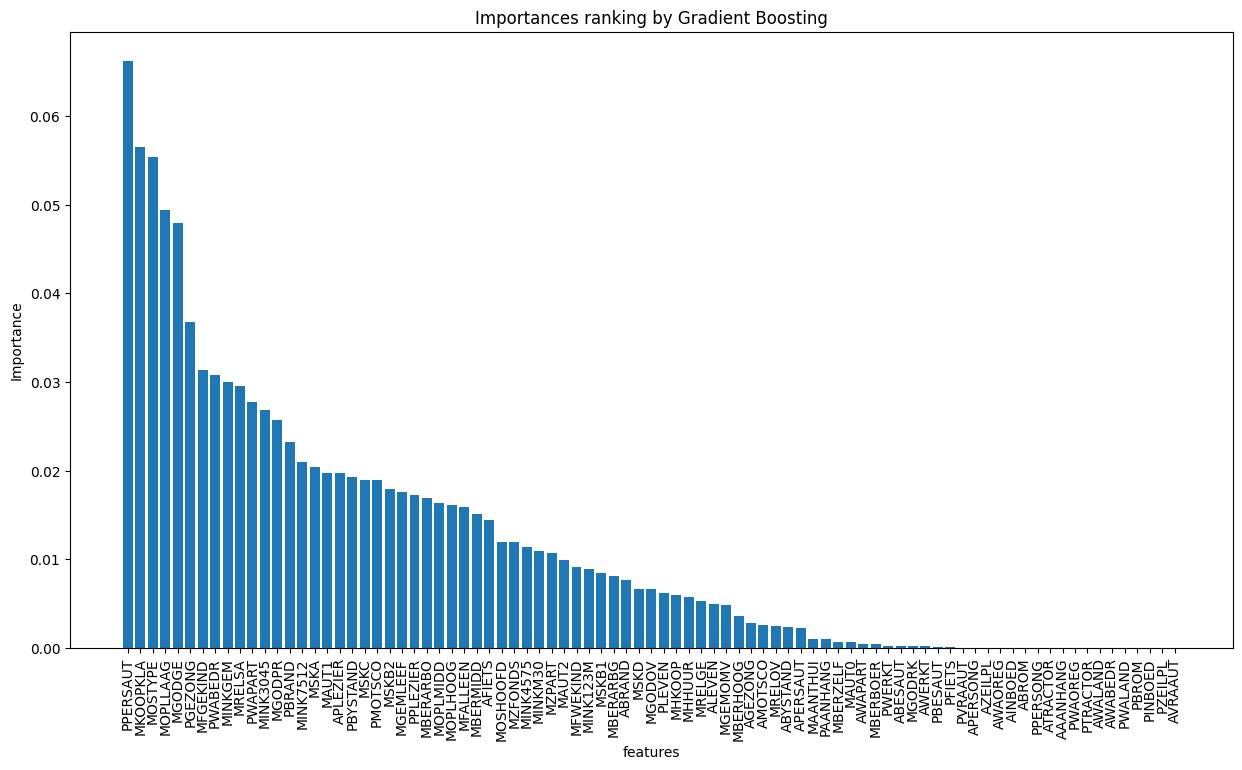

In [ ]:
#B
boosting = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01, random_state = 2025).fit(X_train, y_train)
importance = pd.Series(boosting.feature_importances_, index=X.columns, name = 'importance').sort_values(ascending = False)
plt.figure(figsize = (15, 8))
plt.bar(x = importance.index, height = importance.values)
plt.title('Importances ranking by Gradient Boosting')
plt.ylabel('Importance')
plt.xlabel('features')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
model_proba1 = boosting.predict_proba(X_test)[:, 1]
model_preds1 = (model_proba1 > 0.2).astype(int)
ratio_error1 = 1 - accuracy_score(y_test, model_preds1)
print(f'The ratio of errors made on test data is: {ratio_error1:.5f}')

The ratio of errors made on test data is: 0.06346


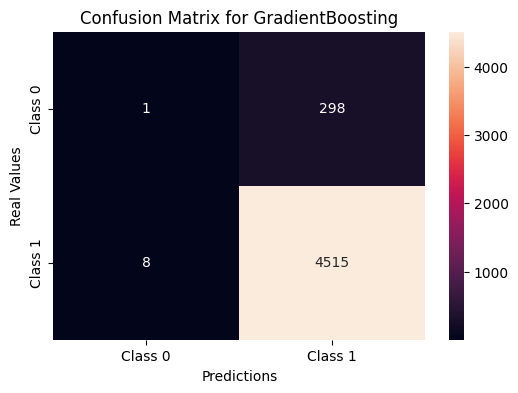

In [ ]:
cf = confusion_matrix(y_test, model_preds1, labels=[0,1])
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='rocket', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix for GradientBoosting')
plt.show()

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
model_proba2 = lr.predict_proba(X_test)[:, 1]
model_preds2 = (model_proba2 > 0.2).astype(int)
ratio_error2 = 1 - accuracy_score(y_test, model_preds2)
print(f'The ratio of errors made on test data bya Logistic Regression is: {ratio_error2:.5f}')

The ratio of errors made on test data bya Logistic Regression is: 0.06221


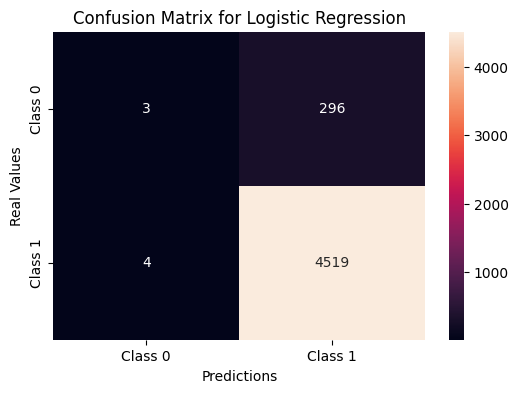

In [ ]:
cf = confusion_matrix(y_test, model_preds2, labels=[0,1])
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='rocket', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

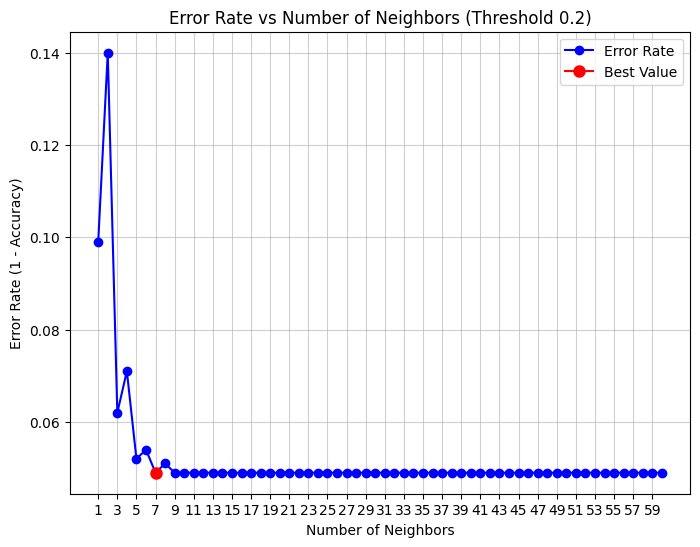

In [ ]:
scores_dict = {}

for n in range(1, 61):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    model_proba = knn.predict_proba(X_test)[:, 1]
    model_preds = (model_proba > 0.2).astype(int)
    accuracy = np.mean(cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10))
    ratio_error = 1 - accuracy

    scores_dict[n] = ratio_error

best_number_neighbors = min(scores_dict, key=scores_dict.get)
best_score = scores_dict[best_number_neighbors]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 61), scores_dict.values(), marker='o', color='blue', label='Error Rate')
plt.plot(best_number_neighbors, best_score, marker='o', color='red', markersize=8, label='Best Value')
plt.xlabel('Number of Neighbors')
plt.xticks(ticks=range(1, 61, 2))
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Error Rate vs Number of Neighbors (Threshold 0.2)')
plt.legend()
plt.grid(alpha=0.6)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
model_proba3 = knn.predict_proba(X_test)[:, 1]
model_preds3 = (model_proba3 > 0.2).astype(int)

ratio_error3 = 1 - accuracy_score(y_test, model_preds3)
print(f'The ratio of errors made on test data bya Logistic Regression is: {ratio_error3:.5f}')

The ratio of errors made on test data bya Logistic Regression is: 0.06201


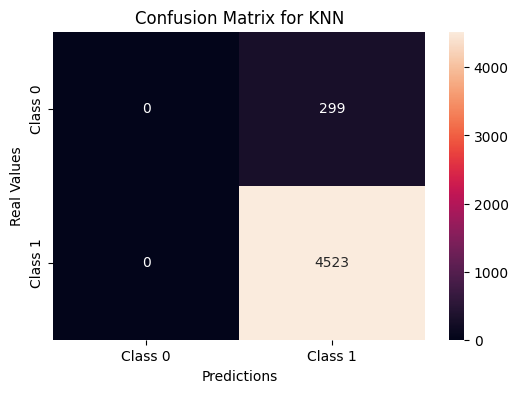

In [ ]:
cf = confusion_matrix(y_test, model_preds3, labels=[0,1])
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='rocket', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix for KNN')
plt.show()

In [ ]:
confusion_matrix?